In [75]:
import pandas as pd
import numpy as np

locations = pd.read_csv(r'/Users/jakefischer/Divvy_repo/DivvyScrape/tract_and_location1.csv')
tracpop = pd.read_csv(r'/Users/jakefischer/Divvy_repo/DivvyScrape/tract_populations.csv')
traffic = pd.read_csv(r'/Users/jakefischer/Divvy_repo/DivvyScrape/traffic_div_data4.csv')


locations.index = locations["Unnamed: 0"]



#this adds the geolocations to the tract and population info
lats = []
longs =[]
for i in list(tracpop["tracts"]):
    if i in list(locations.index):
        lats.append(locations.loc[i, "latitude"])
        longs.append(locations.loc[i,"longitude"])
    else:
        lats.append(float(0))
        longs.append(float(0))

tracpop["lats"] = lats
tracpop["longs"] = longs

tracpop.index = tracpop["tracts"]



#for k in list(tracpop.index):
for k in list(tracpop.index):
    if tracpop.loc[k,"lats"] == float(0):
        tracpop = tracpop.drop([k])



In [100]:
stationtracts = []


for i in list(traffic.index):
    traflat = np.full(shape = tracpop.shape[0], fill_value = float(traffic.loc[i,"lattitude"]))
    traflong = np.full(shape = tracpop.shape[0], fill_value = float(traffic.loc[i,"longitude"]))
    
    latdif = (traflat-list(tracpop["lats"]))
    longdif = (traflong-list(tracpop["longs"]))
    
    d = np.sqrt(latdif*latdif+longdif*longdif)
    
    thetract = np.argmin(d)
    
    stationtracts.append(thetract)
    
    
thetract = []
for i in stationtracts:
    thetract.append(tracpop.iloc[i,1])
    

traffic["tract"] = thetract
    
    
    
thepops = []  
for i in list(traffic["tract"]):
    if i in list(tracpop.index):
        thepops.append(int(tracpop.loc[i,"population"]))
        
    else:
        thepops.append(0)
        
traffic["population"] = thepops
    


In [101]:
traffic

,Unnamed: 0,Unnamed: 0.1,lattitude,longitude,Mon Sep 13 09:46:44 2021,Mon Sep 13 09:47:47 2021,Mon Sep 13 09:48:50 2021,Mon Sep 13 09:49:52 2021,Mon Sep 13 09:50:55 2021,Mon Sep 13 09:51:58 2021,...,Mon Sep 13 11:45:46 2021,Mon Sep 13 11:46:49 2021,Mon Sep 13 11:47:52 2021,Mon Sep 13 11:48:55 2021,Mon Sep 13 11:49:58 2021,Mon Sep 13 11:51:01 2021,Mon Sep 13 11:52:04 2021,absolute traffic,tract,population
0,350,Paulina St & Flournoy St,41.872950,-87.669130,19,19,21,20,23,23,...,25,25,24,24,24,24,24,0.310924,tract: 838100,1853
1,672,W 103rd St & S Avers Ave,41.705846,-87.717074,5,6,6,6,6,6,...,7,7,7,7,7,7,6,0.277311,tract: 740200,6679
2,31,Streeter Dr & Grand Ave,41.892278,-87.612043,5,5,5,5,5,7,...,13,13,14,13,13,13,13,0.252101,tract: 081402,4742
3,192,St. Clair St & Erie St,41.894345,-87.622798,12,12,12,13,14,14,...,18,18,18,18,17,18,18,0.252101,tract: 081401,2251
4,694,N Green St & W Lake St,41.885579,-87.648484,1,1,1,1,1,0,...,1,1,1,0,0,0,0,0.243697,tract: 280100,6725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,182,Indiana Ave & 40th St,41.821680,-87.621600,4,4,4,4,4,4,...,4,4,4,4,4,4,4,0.000000,tract: 835900,3109
741,122,Racine Ave & 13th St,41.865054,-87.656959,4,4,4,4,4,4,...,4,4,4,4,4,4,4,0.000000,tract: 283800,3656
742,385,DuSable Museum,41.791568,-87.607852,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0.000000,tract: 836200,1660
743,185,Prairie Ave & Garfield Blvd,41.794853,-87.618691,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0.000000,tract: 400400,1946


In [102]:
import matplotlib.pyplot as plt


Text(0, 0.5, 'bike traffic')

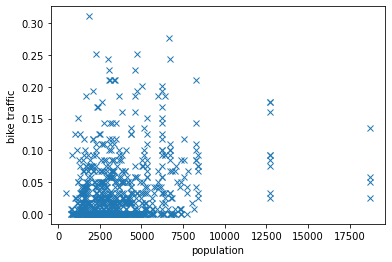

In [105]:
x = traffic["population"]
# corresponding y axis values
y = traffic['absolute traffic']
 
# plotting the points
plt.plot(x, y,linestyle='none', marker = 'x')
plt.xlabel("population")
plt.ylabel("bike traffic")